In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
working_directory = os.getcwd()
print(working_directory)

/Users/razvanstefan/Documents/An 4/PS


In [2]:
# tensorflow libraries/dependencies
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.12.0
Number of GPUs Available: 0


In [3]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [4]:
# data directories:
train_dir = '/Users/razvanstefan/Documents/An 4/PS/train'
test_dir = '/Users/razvanstefan/Documents/An 4/PS/test'

In [5]:
# creating datasets (in form of image generators):
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


# *Vizualizare*

2024-05-13 15:33:44.373190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [140]
	 [[{{node Placeholder/_4}}]]
2024-05-13 15:33:44.373327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [140]
	 [[{{node Placeholder/_4}}]]
2024-05-13 15:33:44.377226: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


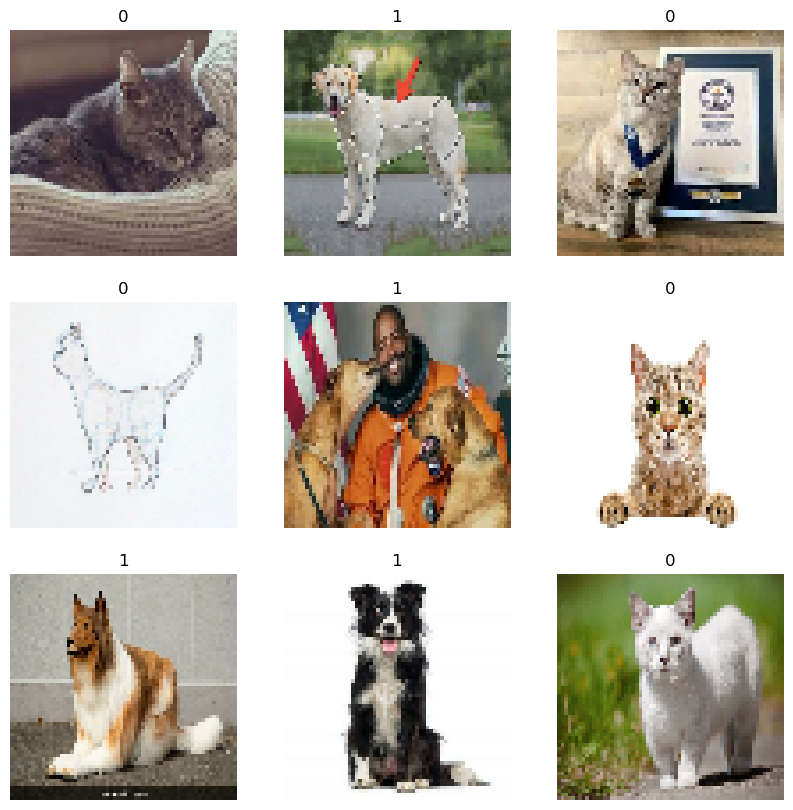

In [6]:
import matplotlib.pyplot as plt

# showing only the first 10 samples of our training data set
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# *Reteaua Neuronala*

In [7]:
# building CNN
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    
    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')
    
])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [9]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=50, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/50


2024-05-13 15:33:45.138783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [557]
	 [[{{node Placeholder/_4}}]]
2024-05-13 15:33:45.138918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [557]
	 [[{{node Placeholder/_0}}]]


17/18 [===========================>..] - ETA: 0s - loss: 0.9888 - accuracy: 0.5312WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 62.5 batches). You may need to use the repeat() function when building your dataset.


18/18 [==============================] - 3s 133ms/step - loss: 0.9819 - accuracy: 0.5368 - val_loss: 8.1193 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.4318 - accuracy: 0.8169WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 0.4318 - accuracy: 0.8169 - lr: 0.0010
Epoch 3/50
17/18 [===========================>..] - ETA: 0s - loss: 0.2573 - accuracy: 0.9301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 0.2587 - accuracy: 0.9282 - lr: 0.0010
Epoch 4/50
17/18 [===========================>..] - ETA: 0s - loss: 0.1739 - accuracy: 0.9522WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 102ms/step - loss: 0.1722 - accuracy: 0.9533 - lr: 0.0010
Epoch 5/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0893 - accuracy: 0.9890WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 99ms/step - loss: 0.0886 - accuracy: 0.9892 - lr: 0.0010
Epoch 6/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0385 - accuracy: 0.9982WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 0.0380 - accuracy: 0.9982 - lr: 0.0010
Epoch 7/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 0.0198 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 0.0109 - accuracy: 1.0000 - lr: 0.0010
Epoch 9/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0064 - accuracy: 1.0000 - lr: 0.0010
Epoch 10/50
18/18 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 0.0043 - accuracy: 1.0000 - lr: 0.0010
Epoch 11/50
18/18 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 0.0034 - accuracy: 1.0000 - lr: 0.0010
Epoch 12/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0028 - accuracy: 1.0000 - lr: 0.0010
Epoch 13/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0022 - accuracy: 1.0000 - lr: 0.0010
Epoch 14/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 0.0010
Epoch 15/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0016 - accuracy: 1.0000 - lr: 0.0010
Epoch 16/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0013 - accuracy: 1.0000 - lr: 0.0010
Epoch 17/50
17/18 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 0.0010
Epoch 18/50
17/18 [===========================>..] - ETA: 0s - loss: 9.0684e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 9.7193e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 19/50
17/18 [===========================>..] - ETA: 0s - loss: 9.6776e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 9.7333e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 20/50
17/18 [===========================>..] - ETA: 0s - loss: 8.1420e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 8.1405e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 21/50
18/18 [==============================] - ETA: 0s - loss: 7.4566e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 7.4566e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 22/50
17/18 [===========================>..] - ETA: 0s - loss: 6.0943e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 6.0374e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 23/50
17/18 [===========================>..] - ETA: 0s - loss: 6.0736e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 7.3637e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 24/50
18/18 [==============================] - ETA: 0s - loss: 6.5152e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 6.5152e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 25/50
17/18 [===========================>..] - ETA: 0s - loss: 6.0412e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 99ms/step - loss: 7.3663e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 26/50
17/18 [===========================>..] - ETA: 0s - loss: 4.8755e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 4.9516e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 27/50
17/18 [===========================>..] - ETA: 0s - loss: 5.1377e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 101ms/step - loss: 5.1305e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 28/50
17/18 [===========================>..] - ETA: 0s - loss: 4.5546e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 100ms/step - loss: 4.5130e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 29/50
17/18 [===========================>..] - ETA: 0s - loss: 3.5380e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 3.5193e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 30/50
17/18 [===========================>..] - ETA: 0s - loss: 3.3526e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 106ms/step - loss: 3.6448e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 31/50
18/18 [==============================] - ETA: 0s - loss: 3.0392e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 3s 109ms/step - loss: 3.0392e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 32/50
17/18 [===========================>..] - ETA: 0s - loss: 2.9946e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 3.0593e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 33/50
18/18 [==============================] - ETA: 0s - loss: 2.6375e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 102ms/step - loss: 2.6375e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 34/50
17/18 [===========================>..] - ETA: 0s - loss: 2.2831e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 102ms/step - loss: 2.2729e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 35/50
18/18 [==============================] - ETA: 0s - loss: 2.3453e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 106ms/step - loss: 2.3453e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 36/50
17/18 [===========================>..] - ETA: 0s - loss: 2.3850e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 3s 109ms/step - loss: 2.4005e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 37/50
18/18 [==============================] - ETA: 0s - loss: 1.8448e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 1.8448e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 38/50
18/18 [==============================] - ETA: 0s - loss: 1.6277e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 1.6277e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 39/50
18/18 [==============================] - ETA: 0s - loss: 1.9382e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 1.9382e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 40/50
17/18 [===========================>..] - ETA: 0s - loss: 1.5551e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 1.6581e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 41/50
18/18 [==============================] - ETA: 0s - loss: 1.5973e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 1.5973e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 42/50
18/18 [==============================] - ETA: 0s - loss: 1.4810e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 1.4810e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 43/50
17/18 [===========================>..] - ETA: 0s - loss: 1.5354e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 1.5345e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 44/50
18/18 [==============================] - ETA: 0s - loss: 1.3521e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 103ms/step - loss: 1.3521e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 45/50
17/18 [===========================>..] - ETA: 0s - loss: 1.3705e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 106ms/step - loss: 1.3665e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 46/50
17/18 [===========================>..] - ETA: 0s - loss: 1.2044e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 1.1860e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 47/50
18/18 [==============================] - ETA: 0s - loss: 1.2594e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 1.2594e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 48/50
18/18 [==============================] - ETA: 0s - loss: 1.0229e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 104ms/step - loss: 1.0229e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 49/50
18/18 [==============================] - ETA: 0s - loss: 1.0210e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 105ms/step - loss: 1.0210e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 50/50
18/18 [==============================] - ETA: 0s - loss: 9.4733e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


18/18 [==============================] - 2s 107ms/step - loss: 9.4733e-05 - accuracy: 1.0000 - lr: 0.0010


# *Graficul antrenarii*

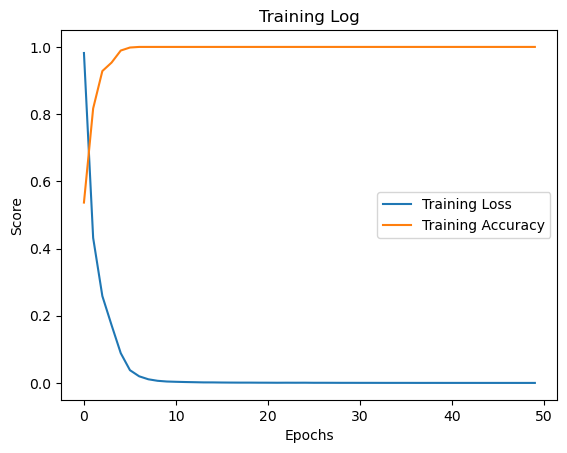

In [10]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
# plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
# plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

# *Evaluare*

In [11]:
res = model.evaluate(test_generator)

5/5 [==============================] - 0s 26ms/step - loss: 1.1684 - accuracy: 0.6929


In [12]:
accuracy = res[1]
print(accuracy)

0.6928571462631226


# *Testare*

In [15]:
img = keras.preprocessing.image.load_img(
    "/Users/razvanstefan/Documents/An 4/PS/test/dogs/dog_124.jpg", 
    target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 [==============================] - 0s 24ms/step
This image is 0.00% cat and 100.00% dog.
